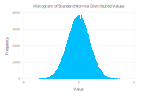

In [1]:
using Random
using Distributions
using Gadfly
Gadfly.push_theme(Theme(background_color="white"))
# Generate 10,000 standard normal distributed values

mean = 0
std_dev = 1

dist = Normal(mean, std_dev)

data = rand(dist, 1000000)

# Create a plot
plot(x=data, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Standard Normal Distributed Values"))


In [2]:
data

1000000-element Vector{Float64}:
  0.4538680676054899
 -0.9029713363373089
  2.7145534601053214
  0.7681224883063595
 -0.629576051213959
 -0.15769099431053443
  0.9731011329087336
 -0.11264461352905918
 -0.0914079684945978
 -0.6916243990349217
  ⋮
  0.6441833726336572
 -0.7018796265113542
  0.42920628311267955
  2.4741451342369696
 -1.007435074185938
 -1.1701770249486059
  0.9068681301227616
 -0.6406300986807933
 -0.6680194940490024

In [3]:
function generate_n_bit_numbers(n, a)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? -a : a for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end

function generate_n_bit_numbers_alpha(n, a)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? a : 1 for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end



n = 3  # Example for 3-bit numbers
a = 1  # Weight value
weights = generate_n_bit_numbers(n, a)

8-element Vector{Any}:
 [-1, -1, -1]
 [-1, -1, 1]
 [-1, 1, -1]
 [-1, 1, 1]
 [1, -1, -1]
 [1, -1, 1]
 [1, 1, -1]
 [1, 1, 1]

In [4]:
# Generate Linear Combinations of the n chunks 

mutable struct LinearCombination
    weights::Vector{Float32}
    inputs::Vector{Float32}
    value::Float32
end 

struct LinearCombinationSet
    combination::Vector{LinearCombination}
end 

lincombs = collect(
    map(
        set -> begin
            LinearCombinationSet(
                collect(map(
                    weights -> begin
                        LinearCombination(weights, set, sum(weights .* set))
                    end,
                    weights
                ))
            )
        end, 
        Iterators.partition(data, n)
    )
)

333334-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[0.45386806, -0.9029713, 2.7145534], -2.2654502f0), LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[0.45386806, -0.9029713, 2.7145534], 3.1636567f0), LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[0.45386806, -0.9029713, 2.7145534], -4.071393f0), LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[0.45386806, -0.9029713, 2.7145534], 1.357714f0), LinearCombination(Float32[1.0, -1.0, -1.0], Float32[0.45386806, -0.9029713, 2.7145534], -1.357714f0), LinearCombination(Float32[1.0, -1.0, 1.0], Float32[0.45386806, -0.9029713, 2.7145534], 4.071393f0), LinearCombination(Float32[1.0, 1.0, -1.0], Float32[0.45386806, -0.9029713, 2.7145534], -3.1636567f0), LinearCombination(Float32[1.0, 1.0, 1.0], Float32[0.45386806, -0.9029713, 2.7145534], 2.2654502f0)])
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[0.7681225

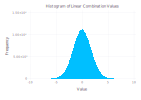

In [5]:
# plot all the values that fall out of this linear combination Vector

# Extract all the values to bastel them in there: 

lincomb_raw = reduce(vcat, map(set -> map(lc -> lc.value, set.combination), lincombs))

plot(x=lincomb_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Linear Combination Values"))

In [6]:
include("julia_code/bach.jl")

filtered = bach_enroll_first(lincombs)

333334-element Vector{LinearCombination}:
 LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[0.45386806, -0.9029713, 2.7145534], -4.071393f0)
 LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[0.7681225, -0.629576, -0.15769099], -1.5553895f0)
 LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[0.97310114, -0.11264461, -0.09140797], -1.1771537f0)
 LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[-0.6916244, -0.9500806, 0.17917152], 1.8208765f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[-0.75751144, -1.3325835, -0.63167363], 2.7217686f0)
 LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[0.13760252, -0.2923064, -0.1520974], -0.58200634f0)
 LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[0.49217027, 0.8135083, -0.68598473], -1.9916633f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[-0.14551061, -1.0975711, -0.5089526], 1.7520344f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[-0.44647527, -0.06728606, -0.2677148], 0.78147614f0)
 LinearCombination(F

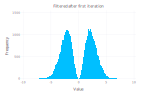

In [7]:
filtered_raw = collect(map(comb -> comb.value, filtered))

plot(x=filtered_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Filtered after first iteration"))

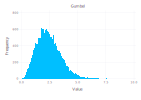

In [8]:
# Split the resulting values into two seperate sets for which we will do the things 

function plot_histogram(lincombs::Vector{LinearCombination}, title, save_to_file::Bool=false)
    p = plot(x=collect(map(comb -> comb.value, lincombs)), Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title(title))
    if save_to_file
        draw(SVG(title * ".svg"), p)
    end
    return p
end

filtered_split = filter(x -> x.value > 0, filtered)

plot_histogram(filtered_split, "Gumbel")

In [9]:
# Count all the elements in this half of the distribution and define the next bound based on the half of this distribution

index = floor(length(filtered_split) / 2)

# Sort the values to find the bound 

sorted_filtered_split = sort(filtered_split, by = x -> x.value)

bound = sorted_filtered_split[convert(Int, index)].value

# Modify everyLinearCombination in filtered_split with the additon of a smaller, fractional weight. 

# For that, alter every linear combination entry to generate a new linear combination set 

additional_weights = generate_n_bit_numbers(n, 0.3)

filtered_split[1].inputs

new_combinations = collect(map(combination -> begin
    LinearCombinationSet(collect(map(weights_vector -> begin
        weights = combination.weights + weights_vector
        return LinearCombination(weights, combination.inputs, sum(weights .* combination.inputs))
    end,additional_weights)))
end,filtered_split))

new_combinations


166385-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.3, -1.3, 0.7], Float32[-0.6916244, -0.9500806, 0.17917152], 2.2596366f0), LinearCombination(Float32[-1.3, -1.3, 1.3], Float32[-0.6916244, -0.9500806, 0.17917152], 2.3671393f0), LinearCombination(Float32[-1.3, -0.7, 0.7], Float32[-0.6916244, -0.9500806, 0.17917152], 1.6895882f0), LinearCombination(Float32[-1.3, -0.7, 1.3], Float32[-0.6916244, -0.9500806, 0.17917152], 1.7970911f0), LinearCombination(Float32[-0.7, -1.3, 0.7], Float32[-0.6916244, -0.9500806, 0.17917152], 1.8446618f0), LinearCombination(Float32[-0.7, -1.3, 1.3], Float32[-0.6916244, -0.9500806, 0.17917152], 1.9521648f0), LinearCombination(Float32[-0.7, -0.7, 0.7], Float32[-0.6916244, -0.9500806, 0.17917152], 1.2746135f0), LinearCombination(Float32[-0.7, -0.7, 1.3], Float32[-0.6916244, -0.9500806, 0.17917152], 1.3821164f0)])
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.3, -1.3, -1.3], Float

In [10]:
include("julia_code/bach.jl")
# Bounds to optimize away from are: bound and 0. 
# 0 has as special condition that no values below 0 are allowed

filtered_new = enroll(bound, new_combinations)

166385-element Vector{LinearCombination}:
 LinearCombination(Float32[-0.7, -0.7, 0.7], Float32[-0.6916244, -0.9500806, 0.17917152], 1.2746135f0)
 LinearCombination(Float32[-1.3, -1.3, -1.3], Float32[-0.75751144, -1.3325835, -0.63167363], 3.538299f0)
 LinearCombination(Float32[-0.7, -0.7, -0.7], Float32[-0.14551061, -1.0975711, -0.5089526], 1.2264241f0)
 LinearCombination(Float32[-0.7, -0.7, -0.7], Float32[-0.44647527, -0.06728606, -0.2677148], 0.5470333f0)
 LinearCombination(Float32[-1.3, 1.3, -1.3], Float32[-0.70008606, 1.7484478, -0.9291035], 4.3909287f0)
 LinearCombination(Float32[-1.3, -1.3, -1.3], Float32[-1.0711337, -1.3456303, -0.33185917], 3.5732102f0)
 LinearCombination(Float32[-1.3, 1.3, -1.3], Float32[-2.3334146, 0.10857583, -0.12486853], 3.3369167f0)
 LinearCombination(Float32[-1.3, 1.3, -1.3], Float32[-0.39724246, 0.93330556, -1.2483462], 3.3525624f0)
 LinearCombination(Float32[-0.7, -0.7, 0.7], Float32[-0.48507285, -0.21619706, 0.19663048], 0.62853026f0)
 LinearCombinatio

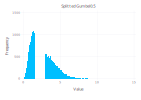

In [11]:
plot_histogram(filtered_new, "Splitted Gumbel0.5")

In [12]:
before_bound = count(x -> x.value < bound, filtered_new)
after_bound = count(x -> x.value >= bound, filtered_new)

println("Number of LinearCombination objects before the bound: ", before_bound)
println("Number of LinearCombination objects after the bound: ", after_bound)

Number of LinearCombination objects before the bound: 83191
Number of LinearCombination objects after the bound: 83194


In [15]:
median(map(x -> x.value, filtered_new))

2.9787462f0